<h1> Machine Learning Portfolio </h1>
</br>
Dieser Datensatz enthält alle aktuellen und aktiven Geschäftslizenzen der USA, die von der Abteilung für Unternehmensangelegenheiten und Verbraucherschutz ausgestellt wurden.[1]
Einzelene Spalten wurden vom Herausgeber wie folgt beschrieben:
</br>
</br>
1. APPLICATION TYPE: 
<li>"ISSUE" ist der Eintrag, der mit dem ersten Lizenzantrag verbunden ist. 
<li>"RENEW" ist ein Eintrag für eine spätere Erneuerung. Alle Einträge werden mit einem Datum für den Beginn und das Ende der Gültigkeitsdauer erstellt. 
<li>"C_LOC" ist ein Eintrag über eine Standortverlegung. Dies bedeutet, dass das Unternehmen umgezogen ist. 
<li>"C_CAPA" ist ein Beleg für die Änderung der Kapazität. Nur wenige Lizenztypen können diese Art von Antrag stellen. 
<li>"C_EXPA" gilt nur für Unternehmen, die über eine Schanklizenz verfügen. Dies bedeutet, dass der Standort des Unternehmens erweitert wurde.[2] 

</br>
</br>
2. LICENSE STATUS: 
<li>"AAI" bedeutet, dass die Lizenz erteilt wurde.
<li>"AAC" bedeutet, dass die Lizenz während ihrer Laufzeit gekündigt wurde.
<li>"REV" bedeutet, dass die Lizenz widerrufen wurde.
<li>"REA" bedeutet, dass der Entzug der Lizenz angefochten worden ist.[3] 

</br>
</br>

<span id="fn1"> 1 [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data) </span> 
    
<span id="fn2"> 2 [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data) </span> 
    
<span id="fn3"> 3 [Chicago Data Portal](https://data.cityofchicago.org/Community-Economic-Development/Business-Licenses-Current-Active/uupf-x98q/data) </span> 

In dieser Arbeit werden die folgende Punkte behandelt:
1. **Data Exploration/Cleaning/Outlier detection**
2. **Data Preparation** Hinweis: bei diesem Datensatz könn(t)en zusammengesetzte, bzw berechnete Werte aussagekräftig sein
3. **Model building** d.h. Auswahl verschiedener Modelle inkl Analyse der Vor- und Nachteile für die gegebenen Daten, bzw Fragestellung
4. **Classification Metrics**
5. **Feature Importance**

<h3> Fragestellung der Analyse </h3>

Der Datensatz soll analysiert werden. Zusätzlich soll erörtert werden, wie man für zukünftige Datensätze des gleichen Typs Vorhersagen machen könnte, welcher Kategorie der Datensatz zugeortnet wird.

Die Kategorien sind aus der letzten Spalte (AF: License Status) ersichtlich.

Um Vorhersagen zu treffen werden Machine Learning Modelle mithilfe von Sckit Learn eingesetzt, genauer handelt es sich bei der Vorhersage von Kategorien um Klassifizierungsmodelle.[4]

<span id="fn4"> 4
    [Bruce,Bruce&Gedeck,2021,S.201](https://eds.p.ebscohost.com/eds/detail/detail?vid=3&sid=e4a31c68-c554-44f0-9cf6-7bc73b3294c5%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=2910692&db=nlebk) </span>

<h2> 1. Data Exploration/Cleaning/Outlier detection </h2>

<p> Zu Beginn der Analyse ist es sinnvoll einen Überblick über die Daten zu erhalten. Dabei sind die Größe des Datensatzes und der Inhalt der einzelnen Spalten relevante Faktoren für die weitere Analyse. Mithilfe der Größe des Datensatzes können wir feststellen welche Modelle für die später angewandte Klassifizierung sinnvoll sind. Die Inhalte der relevanten Spalten sind hilfreich um die Ergebnisse der Analyse nachzuvollziehen. </p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
data = pd.read_csv("License_Data.csv")
pd.set_option('display.max_columns', None)

c:\users\kranz\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
data.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION CREATED DATE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,Limited Business License,35342.0,RENEW,NaN,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,Mobile Food Dispenser,1358463.0,RENEW,NaN,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,NaN,NaN,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-06-29T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,NaN,NaN,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,NaN,NaN,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,NaN,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [5]:
data.shape

(85895, 32)

<p> Unser Datensatz hat 85.000 Einträge und 32 Spalten. </p>

<h3> Look at the target variable </h3>

<p> Da die Lizenzkategorie unsere Zielvariable ist, wollen wir uns diese genauer anschauen. Dabei möchten wir sehen, welche Werte sich darin befinden </p>

In [6]:
data['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

<p> Damit lässt sich feststellen, das die Kategorie "AAI" am häufigsten vorkommt, welche einer erteilten Lizenz entspricht. "AAC" kommt mit mehr als 20.000 Einträgen weniger an zweiter Stelle. Die Kategorien "REV" und "INQ" kommen mit weniger als 500 Einträgen bishin zu 2 Einträgen sehr selten vor. </p>

<h3> Handelling Null Data </h3>

<p> Um den Datensatz anschließend zu säubern, ist ein Blick auf die Null Daten ratsam. Damit lässt sich erkennen ob der Datensatz vollständig ist oder ob einige Werte fehlen. Mithilfe der folgenden Funktion können die Anteile der Null werte jeder Spalte in Prozent betrachtet werden. </p>

In [15]:
data.isna().sum()/len(data)*100

ID                                    0.000000
LICENSE ID                            0.000000
ACCOUNT NUMBER                        0.000000
SITE NUMBER                           0.000000
LEGAL NAME                            0.000000
DOING BUSINESS AS NAME                0.001164
ADDRESS                               0.000000
CITY                                  0.000000
STATE                                 0.000000
ZIP CODE                              0.036091
WARD                                 57.862507
PRECINCT                             66.011991
WARD PRECINCT                        57.861342
POLICE DISTRICT                      62.881425
LICENSE CODE                          0.000000
LICENSE DESCRIPTION                   0.000000
LICENSE NUMBER                        0.001164
APPLICATION TYPE                      0.000000
APPLICATION CREATED DATE             75.277956
APPLICATION REQUIREMENTS COMPLETE     0.249141
PAYMENT DATE                          1.500669
CONDITIONAL A

<p> Unser Datensatz hat 10 Spalten, welche einen hohen Anteil an Null Werten aufweisen. Die anderen Spalten haben dafür sehr gerine bis keine fehlenden Werte. Da eine hohe Anzahl an Null Werten die Performance der Analyse negativ beeinflussen kann, sollte im nächsten Schritt entschieden werden wie diese Werte verringert werden. Ein Ansatz wäre, die Spalten mit hohen Anteilen aus den Daten zu Löschen, eine weitere Methode wäre, die Null Werte gegen sinnvolle Werte zu ersetzten.

Da wir bereits viele Spalten haben, können die Spalten mit Null-Anteilen von über 60 % gelöscht werden. Das bedeutet, dass 5 Spalten aus dem Datensatz geworfen werden. Die restlichen Spalten mit einem hohen Anteil an fehlenden Werten sollten sich genauer angeschaut werden. </p>

In [16]:
#drops Colums with too many null values
data = data.drop(columns=data.columns[((data.isna().sum()/len(data)) > 0.60)])
data.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'WARD PRECINCT', 'LICENSE CODE', 'LICENSE DESCRIPTION',
       'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

<p> Folgende Spalten werden genauer betrachtet, um die Null Werte zu minimieren:
    <li>WARD
    <li>WARD PRECINCT
    <li>LATITUDE
    <li>LONGITUDE
    <li>LOCATION
        
Es handelt sich bei allen Spalten um geographische Daten, um diese sinnvoll zu ergänzen können zusätzliche Datenquellen verwendet werden. Für die Spalten der Längen- und Breitengrade könnten APIs eingesetzt werden um mithilfe der Spalte "ADDRESS" die fehlenden Werte zu ersetzten. Bei den Bezirken, stellt sich zuerst die Frage ob es überhaupt überall Bezirke gibt 
        
</p>

<h3> Drop unuseful columns </h3>

<p>Ein weiterer Punkt, welcher bei der Datensäuberung wichtig ist, ist das Löschen unwichtiger Spalten. Damit sind Spalten gemeint, welche für die Analyse unbedeutend sind. Damit kann die Größe des Datensatzes angepasst werden, um den wichtigen Spalten mehr Bedeutung zu schenken.
</p>

<p> Wir haben uns entschlossen die Spalten "ADDRESS", sowie "LOCATION" zu entfernen. Die Adresse spielt für die Analyse keine Rolle, da breits genug geographische Daten wie die Koordinaten, die Stadt, der Bundesstaat und der ZIP Code vorhanden sind. Zudem sind die Einträge unterschiedlich formatiert, was die Analyse negativ beeinflussen könnte. </p>

In [17]:
data = data.drop(["ADDRESS"], axis = 1)
#we already have coordinates aswell as city, state, zip code and so on.. no need to have the adress
#plus this column is very bad formated

<p> Aus dem selben Grund aus dem wir die Adresse entfernt haben, wird auch die Spalte "LOCATION" entfernt. Die Längen- und Breitengrade sind bereits in einzelne Spalten aufgeteilt und werden somit nicht in einer zusätzlichen Spalte in welche die Koordinaten in einem Dictionary auflistet, benötigt. </p>

In [18]:
data = data.drop(["LOCATION"], axis = 1)
#we have latetude and longetude in separted columns- don't need a dictonary

<h2> Vizualization </h2>

Zusätzlich ist neben der Datensäuberung auch eine Visualisierung der Daten hilfreich, um wertvolle Erkenntnise über die Daten zu schließen.[5] </br>
Deshalb ist es wichtig in jeder Analyse Darstellungen zu erstellen, welche zur anfänglichen Fragestellung beitragen können.

<span id="fn5"> 5 [Bruce,Bruce&Gedeck,2021,S.47](https://eds.p.ebscohost.com/eds/detail/detail?vid=3&sid=e4a31c68-c554-44f0-9cf6-7bc73b3294c5%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=2910692&db=nlebk) </span> 

<p> Da wir genügend geographische Daten zur Verfügung haben, ist eine Darstellung mithilfe einer Map möglich. So können wir sehen an welchen Orten, welche Lizenz vorliegt. Das hilft dabei zu erkennen ob eine bestimmte Kategorie an einem Ort vermehrt vorkommt als an anderen Orten. </p>

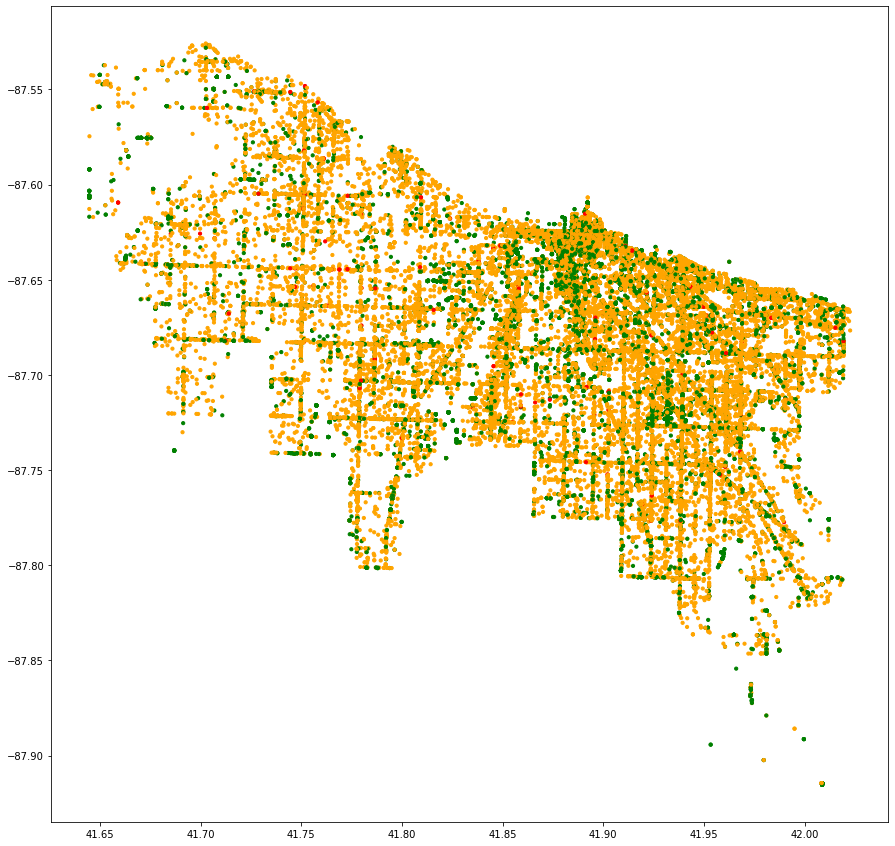

In [29]:
fig, ax = plt.subplots(figsize=(15,15))

colors = {'AAI':'green', 'AAC':'orange', 'REV':'red', 'REA':'yellow', 'INQ': 'grey'}

ax.scatter(data['LATITUDE'], data['LONGITUDE'],s=10, c=data['LICENSE STATUS'].map(colors))

plt.show()


![USA MAP](usa_map.png)

<p> Um die Visualisierung genauer zu machen, wäre es zudem sinnvoll eine Landkarte als Hintergrund zu legen. Wir können anhand des Scatterplots bereits erkennen, dass die Kategorien größtenteils ausgeglichen verteilt sind. Im Nord-Osten lässt sich aber eine höhere Anzahl der Lizenz "AAI" erkennen, als in den anderen Regionen. Wichtig anzumerken ist aber, dass die Koordinaten einige Null Werte aufweisen und eine korrekte Annahme erst mit vollständigen Daten getroffen werden kann. </p>

<h2> 2. Data Preperation </h2>


## Index

Nachdem wir bereits einige Spalten entfernt haben, ändern wir nun den Index unseres Datensatzes. Statt der bisher einfachen Nummerierung der Spalten, verwenden wir nun die Spalte „ID“ als Index. Dies wäre nicht zwangsweise notwendig, sorgt jedoch für eine einfachere Zuordnung bzw. Übersicht. Zusätzlich entfernen wir die Spalten license id, acount number, legal name und doing business as name, da diese keine Informationen zur Klassifikation enthalten, sondern lediglich organisatorische Daten enthalten. Über die eindeutige ID können diese jederzeit wieder aufgerufen werden.

In [19]:
data = data.set_index("ID")
data = data.drop(["LICENSE ID", "ACCOUNT NUMBER", "LEGAL NAME", "DOING BUSINESS AS NAME", "ZIP CODE"], axis=1)

# Zielvariable
y = data["LICENSE STATUS"]
# Features
X = data.drop(["LICENSE STATUS"], axis=1)

## Label Encoder

Da der Datensatz viele nicht numerische Spalten enthält, viele Klassifikations-Algorithmen jedoch nur mit numerischen Werten arbeiten können und selbst nicht in der Lage sind, strings in integer/floats umzuwandeln, müssen wir als Vorbereitung diese Spalten in numerische Werte umwandeln. Umgesetzt haben wir dies mit der Preprocessing Funktion „LabelEncoder“ von sklearn. Dieser wandelt Text-Spalten in numerische Werte um, indem er ihnen Werte zwischen 0 und Klassenzahl - 1 zuweist.
 
Vorteil dieses Verfahren ist, dass es einfach und schnell umgesetzt ist und den Datensatz nicht vergrößert.
Nachteil ist jedoch, dass einige Algorithmen diese numerischen Werte als hierarchisch interpretieren. Dies wäre jedoch nicht richtig, da die Zahlen lediglich kategorische Werte darstellen.

Eine andere Möglichkeit mit diesen Werten umzugehen wäre, einen One-Hot Encoder zu verwenden, der für jeden Wert einer Kategorie eine zusätzliche Spalte erstellt, und dann immer einzeln mit 1 oder 0 bewertet, ob beispielsweise das Unternehmen dieser Kategorie zugehörig ist oder nicht.
Vorteil dieses Verfahrens ist, dass ein Algorithmus hierin keine Hierarchie interpretieren wird.
Allerdings vergrößert das den Datensatz um viele zusätzliche Spalten. Gerade in unserem Anwendungsfall, da wir einige Spalten mit Text haben und diese teilweise auch mehrere unterschiedliche Werte haben können. Dies würde viele zusätzliche Spalten und eine erhöhte Rechenzeit zur Folge haben.[6]

<span id="fn6"> 6 [Towards Data Science, 2019](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd) </span> 

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X = X.apply(le.fit_transform)

## Feature Scaling

Für einige Algorithmen ist es notwendig, dass die Input-Werte keine zu unterschiedlichen Skalierung aufweisen. Eine Variante, dies zu vermeiden, ist die Standardisierung. Bei dieser wird zuerst der Mittelwert entfernt und dann auf eine einheitliche Abweichung skaliert. Die Werte haben also immer einen Mittelwert von 0. Vorteil dieses Verfahrens ist, dass es von Ausreißer-Werten kaum beeinflusst wird.

Eine andere Variante des Feature Scalings wäre die Normalisierung. Hierbei werden alle Werte in einen vorgegebenen Bereich von 0 und 1 skaliert. Einige Algorithmen arbeiten nur mit Werten, die sich in diesem festgelegten Bereich befinden. Nachteil ist jedoch, dass es wesentlich stärker von Ausreißern beeinflusst wird. Ein besonders hoher Wert würde beispielsweise dazu führen, dass alle anderen Werten in einem sehr kleinen Bereich nahe 0 liegen würden.[7]

<span id="fn7"> 7 [Geron,2019,S.72-73](https://eds.s.ebscohost.com/eds/detail/detail?vid=1&sid=3d78d21a-1ef6-4c97-98c4-bc8a3b4df3cf%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=bdl.1039858198&db=cat07675a) </span> 

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

## Trainings- und Testdaten

Bevor man beginnt ein Algorithmus zu trainieren, sollte man seinen Datensatz noch in Trainings- und Testdaten aufteilen. Wichtig ist dabei, dass die Aufteilung zufällig und nicht nach einem bestimmten Muster erfolgt. Mit den Trainingsdaten kann man dann das Klassifikations-Modell trainieren. Während des gesamten Trainings- und Optimierungsprozesses werden die übrigen Testdaten nicht verwendet. Erst zum Schluss setzt man die Testdaten ein, um das fertige Modell zu überprüfen. Somit ist es möglich einen Test mit Daten durchzuführen, welche das Modell zuvor noch nie als Input hatte und sich nicht explizit auf diese trainieren konnte. Dies hat ein wesentlich realitätsnäheres Ergebnis zur Folge.[8]

Aufgeteilt haben wir unsere Daten mit Hilfe des train_test_split von sklearn, wobei wir 20% der Daten als Testdaten verwendet haben.

<span id="fn8"> 8 [Geron,2019,S.54-56](https://eds.s.ebscohost.com/eds/detail/detail?vid=1&sid=3d78d21a-1ef6-4c97-98c4-bc8a3b4df3cf%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=bdl.1039858198&db=cat07675a) </span> 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

<h2> 3. Model building </h2>

<h2> 4. Classification Metrics </h2>

## Cross Validation

Cross Validation ist eine Methode zur Vorhersagebewertung, bei der lediglich die Trainingsdaten verwendet werden. Das heißt, die Testdaten werden weiterhin nicht beachtet und können allein für den Test des schlussendlichen Modells verwendet werden. Cross Validation funktioniert, indem aus dem Trainingsset verschiedene Subsets gebildet werden. Mit einem Teil dieser Subsets wird das Modell trainiert und dann auf die übrigen Trainingsdaten angewandt. Dies wird dann mehrmals durchgeführt, wobei die verschiedenen Subsets wechseln. Das durchschnittliche Ergebniss der verschiedenen Durchgänge bildet dann den Cross-Validation-Score. (Ein perfektes Modell hätten einen Score von 1).[9]

<span id="fn9"> 9 [Geron,2019,S.91-92](https://eds.s.ebscohost.com/eds/detail/detail?vid=1&sid=3d78d21a-1ef6-4c97-98c4-bc8a3b4df3cf%40redis&bdata=Jmxhbmc9ZGUmc2l0ZT1lZHMtbGl2ZQ%3d%3d#AN=bdl.1039858198&db=cat07675a) </span> 

<h2> 5. Feature Importance </h2>

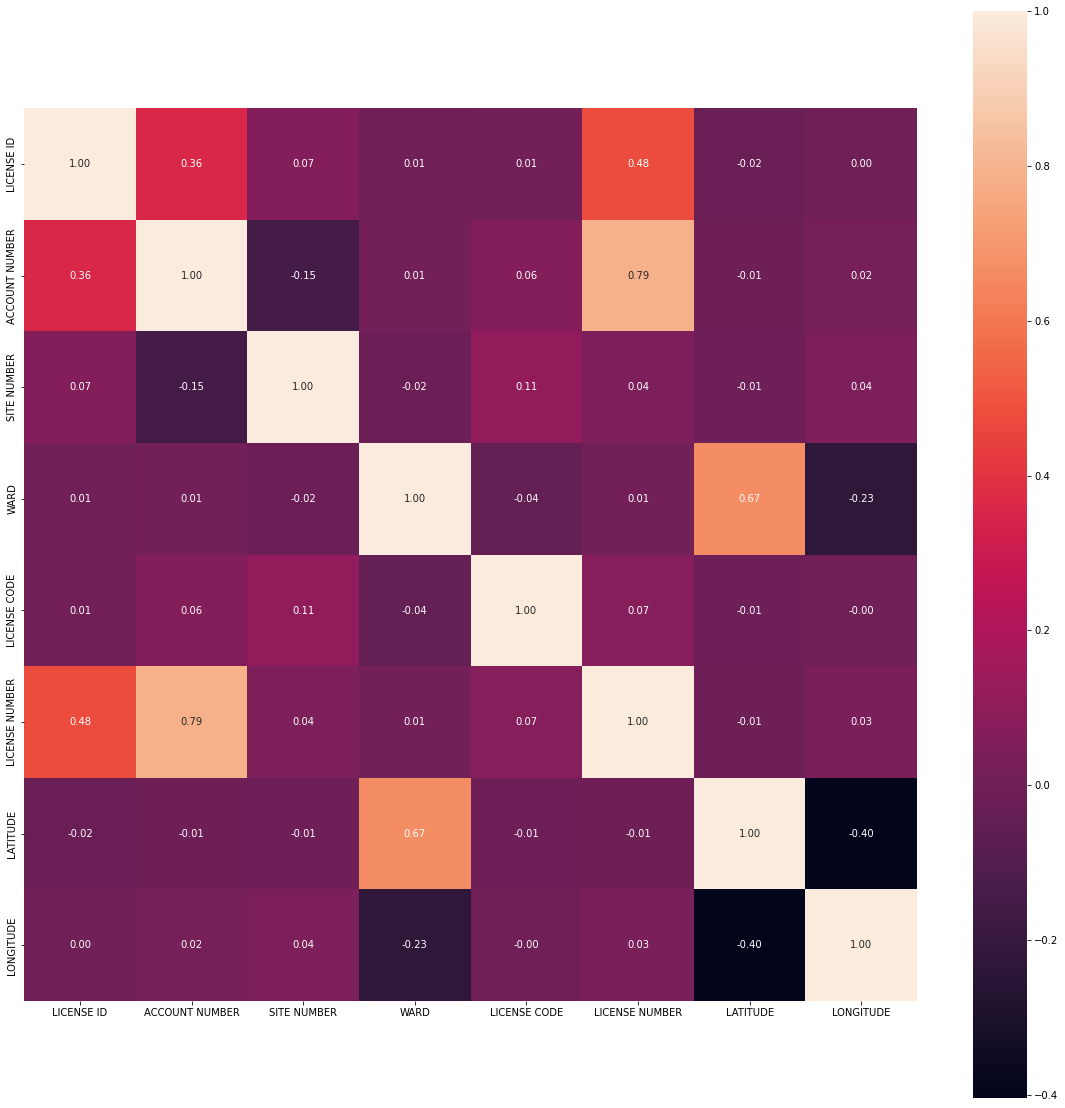

In [15]:
#creates a Correlation Matrix
def correlation_matrix(df):
    corr = df.corr()
    f, ax = plt.subplots(figsize=(20, 20))
    sns.heatmap(corr, square = True,fmt='.2f' ,annot = True)
    
correlation_matrix(data)    

In [7]:
data.shape

(85895, 27)

In [17]:
data

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,WARD PRECINCT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,APPLICATION TYPE,APPLICATION REQUIREMENTS COMPLETE,PAYMENT DATE,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LATITUDE,LONGITUDE,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,22-28,1010,Limited Business License,35342.0,RENEW,2002-06-28T00:00:00,2002-08-21T00:00:00,N,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,41.843613,-87.714618,AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,33-23,1315,Mobile Food Dispenser,1358463.0,RENEW,2005-09-22T00:00:00,2005-11-03T00:00:00,N,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,41.961132,-87.699626,AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,NaN,NaN,1011,Home Repair,1980233.0,ISSUE,2009-07-22T00:00:00,2009-07-22T00:00:00,N,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,NaN,NaN,1010,Limited Business License,1476582.0,ISSUE,2004-02-10T00:00:00,2004-02-10T00:00:00,N,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,NaN,NaN,1010,Limited Business License,1141408.0,RENEW,2008-03-24T00:00:00,2008-06-04T00:00:00,N,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,AAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85890,12652-20120516,2143400,8011,1,UNITED PARCEL SERVICE,UNITED PARCEL SERVICE,CHICAGO,IL,60607.0,11.0,11-28,1008,Hazardous Materials,12652.0,RENEW,2012-03-15T00:00:00,2012-05-07T00:00:00,N,2012-05-16T00:00:00,2014-05-15T00:00:00,2012-05-07T00:00:00,2012-05-08T00:00:00,41.863501,-87.642210,AAC
85891,1821421-20070522,1821421,317725,1,"EXPRESS BOARD UP SERVICE, INC.","EXPRESS BOARD UP SERVICE, INC.",MACHESNEY PARK,IL,61115.0,NaN,NaN,1800,Board-Up Work,1821421.0,ISSUE,2007-05-22T00:00:00,2007-05-22T00:00:00,N,2007-05-22T00:00:00,2009-06-15T00:00:00,2007-05-22T00:00:00,2007-05-22T00:00:00,NaN,NaN,AAI
85892,74137-20090116,1939358,8458,2,ARAMARK SMMS LLC,ARAMARK FACILITY SERVICES,DOWNERS GROVE,IL,60515.0,NaN,NaN,1010,Limited Business License,74137.0,RENEW,2008-11-14T00:00:00,2009-01-09T00:00:00,N,2009-01-16T00:00:00,2011-01-15T00:00:00,2009-01-09T00:00:00,2009-12-08T00:00:00,NaN,NaN,AAI
85893,2049545-20111016,2110060,2156,43,GENERAL NUTRITION CORPORATION,GENERAL NUTRITION CENTER # 61,CHICAGO,IL,60632.0,23.0,23-,1010,Limited Business License,2049545.0,RENEW,2011-08-15T00:00:00,2011-10-03T00:00:00,N,2011-10-16T00:00:00,2013-10-15T00:00:00,2011-10-03T00:00:00,2011-10-11T00:00:00,41.799012,-87.723181,AAC


<h3> Make a Map </h3>

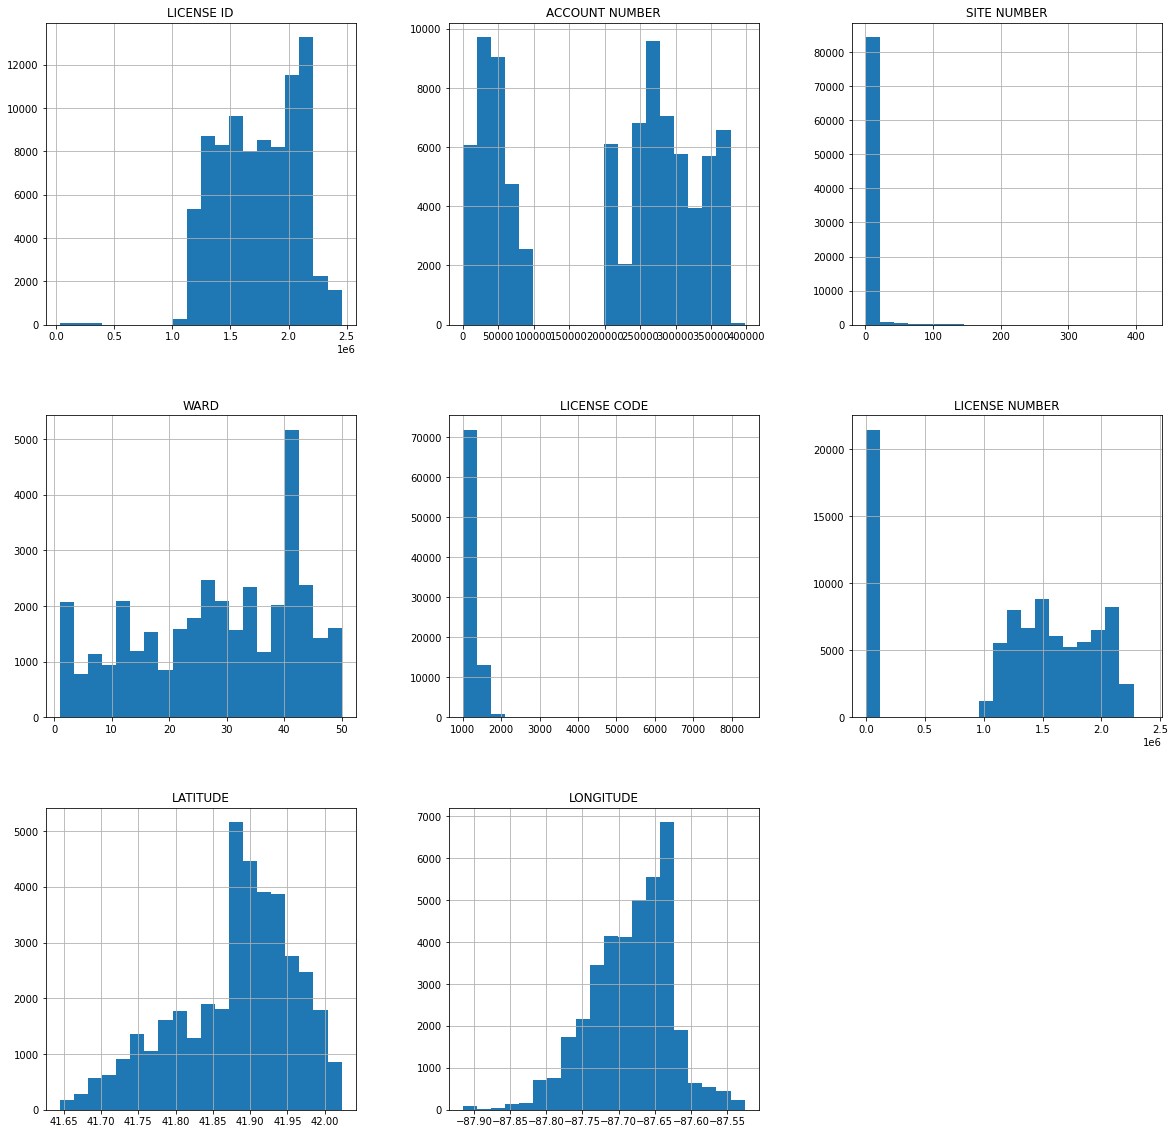

In [24]:
#Makes a Histogram
def pd_hist(df,bins,attribute=False):
    if bool(attribute) == True:
        test_df = df[attribute]
        hist = test_df.hist(bins=bins,figsize=(20,20))
    else:
        hist = df.hist(bins=bins,figsize=(20,20))
        
pd_hist(data, 20)